# Physics 386 Homework #2

The method of Maximum Likelihood, demonstrated with a toy Monte Carlo. 
The parts with a * next to them require plots or output numbers.


a) * Plot a Poisson distribution for $\mu=3$. A Poisson distribution is only valid for integers of $N$, the number you observe (the variable on the $x$ axis). So, it should look like a bar chart or histogram, or have points for each integer and no line.

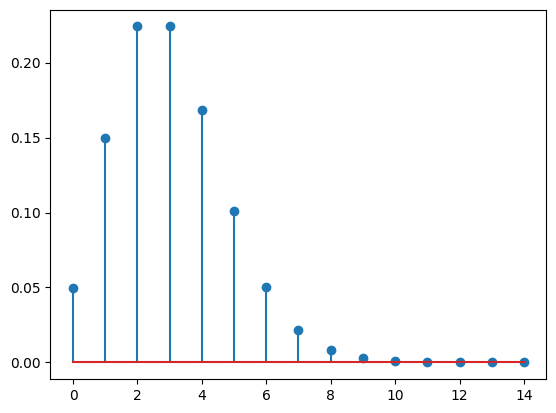

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
from scipy.special import factorial#how is this the only way to get a factorial of an array... thanks stackoverflow!
n = np.arange(0,15)
pdf = (3**n)*np.exp(-3)/factorial(n)
plt.stem(n,pdf)
plt.show()

b) Draw 50 random numbers (samples) from the Poisson distribution in a). This is your “data.”

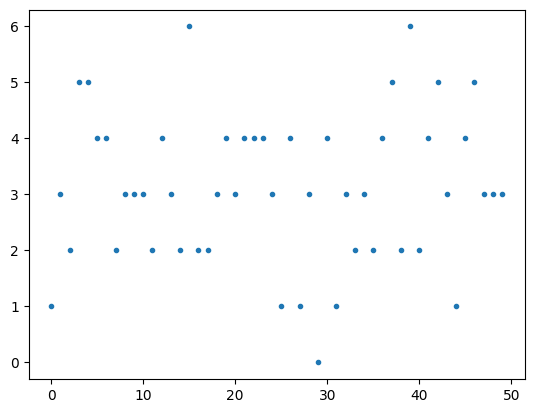

In [2]:
N = 50
data = np.random.poisson(3,N)
plt.plot(np.arange(0,N),data,'.')
plt.show()

c) Repeat part b) 100 more times, i.e. generate 100 instances of 50 samples drawn from the same distribution. These are your “simulations” i.e. 100 sets of simulated data that have the same properties as your real data.


In [10]:
M=100
sims = np.random.poisson(3,(N,M))

d) * For each of your 100 simulations and 1 data set, calculate the mean value of the 50 samples. Plot a histogram of the sample mean value to demonstrate (by eye at least) that this is an unbiased estimator for mu.  Plot a colored vertical line at the location of the data to show its location relative to the simulated distribution.   (This histogram should have 100 entries in it, plus 1 entry for the data.)

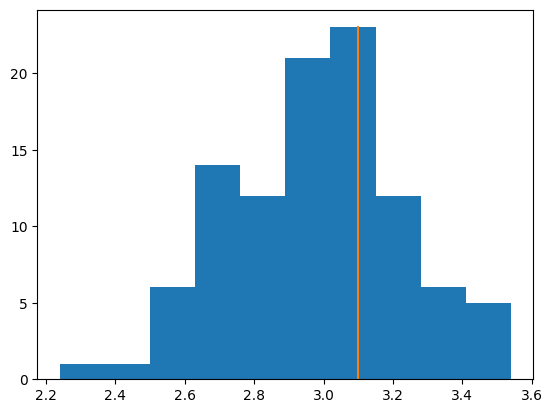

In [11]:
means = np.mean(sims,0)
mean_data = np.mean(data)
counts,bins = np.histogram(np.append(means, mean_data))
plt.hist(np.append(means, mean_data),bins = 10)
plt.plot(mean_data*np.ones(2),[0,max(counts)])
plt.show()

e) * For each simulated set and for the real data (101 total cases), calculate the likelihood function for your “data” and “simulated data.” Plot all of the 101 likelihood functions on one plot (y-axis should be ln(L)). Differentiate the “data” curve with a thicker line and a different color, so we know which is your “data.” Label the x axis with the proper label (note, this isn’t the N from part a) now). Note that now you are not stuck with integer values on the x-axis, and your curves should look smooth.

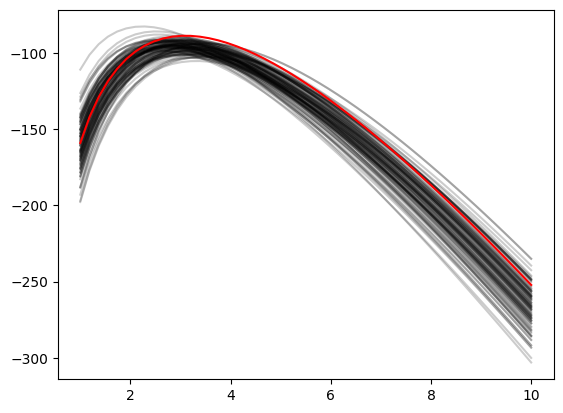

In [55]:
N_mu = 50
mus = np.linspace(1,10,N_mu)
logL = np.empty((M,N_mu))
logL_data = np.empty((1,N_mu))
i=0
for mu in mus:
    logL_pts=np.log(sci.poisson.pmf(sims,mu))
    logL[:,i]=np.transpose(sum(logL_pts))
    logL_data[0,i] = sum(np.log(sci.poisson.pmf(data,mu)))
    i+=1
plt.plot(mus,np.transpose(logL),'k-',alpha = 0.2)
plt.plot(mus,logL_data[0,:],'r-')
plt.show()

f) * Use the method of maximum likelihood to estimate the true value of mu from each simulation and your real data.

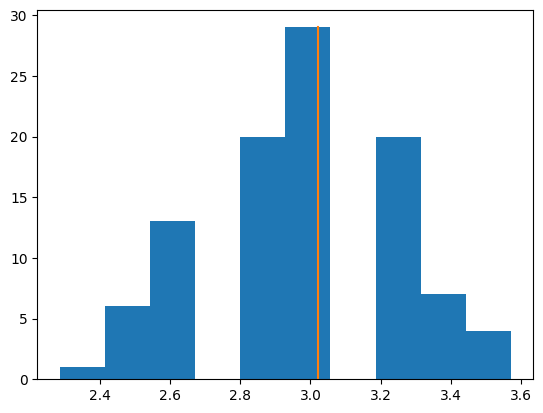

In [64]:
mu_est = mus[np.argmax(logL,1)]
cts,bins = np.histogram(mu_est,bins = 10)
plt.hist(mu_est,bins = 10)
mu_sim = mus[np.argmax(logL_data)]
plt.plot(mu_sim*np.ones((2,1)),[0,max(cts)])
plt.show()

g) * Use the rule of thumb that the log likelihood decreases by -½ from its peak value at the +/-1 sigma errors to estimate the error on this reconstruction. (see note	 N1 below) 


1-sigma range:  2.747625782986461  to  3.216811477066075


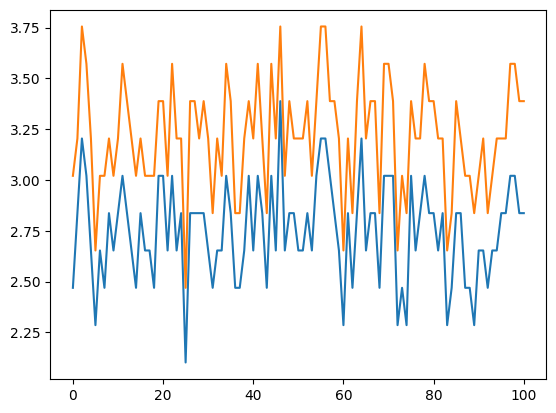

In [132]:
lowers = (M+1)*[0]
uppers = (M+1)*[0]
for i in range(M+1):
    if i<M:
        sample = logL[i,:]
        halfmax = np.max(sample)-0.5
        halfmax_range = mus[np.argsort(abs(sample-halfmax))[0:2]]
    else:
        sample = np.array(logL_data)
        halfmax = np.max(sample)-0.5
        halfmax_range = mus[np.argsort(abs(sample-halfmax))[0,0:2]]
    lowers[i] = np.min(halfmax_range)
    uppers[i] = np.max(halfmax_range)
plt.plot(lowers)
plt.plot(uppers)
print("1-sigma range: ",np.mean(lowers)," to ",np.mean(uppers))
plt.show()
    

h) * For the estimate of mu and the “one sigma error bars” quoted from your data, what fraction of the estimates of the 100 simulations fall in this range?

In [137]:
data_range = [lowers[-1],uppers[-1]]
in_range = np.where((mu_est<data_range[1]) & (mu_est>data_range[0]))
print(np.size(in_range)/M)

0.49
